In [1]:
#cargar librerías
library(tidyverse)
library(sf)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE



In [8]:
#cargar los datos

#NORTE ENSENADA
data10 <- read.csv("DATA/FULL_NORENS_AGEBS_10.csv")
data20 <- read.csv("DATA/FULL_NORENS_AGEBS_20.csv")

#TODO ENSENADA
#data10 <- read.csv("DATA/FULL_ENS_AGEBS_10.csv")
#data20 <- read.csv("DATA/FULL_ENS_AGEBS_20.csv")

<b>Variables sociales</b>
1. Población total (PT)
2. Niños de 0-4 años (N)
3. Adultos mayores de 65 años (AM)
4. Grado promedio de escolaridad (E)
5. Promedio de hijos nacidos vivos (H)

<b>Variables espaciales</b>

6. Número de viviendas (V)
7. Promedio de ocupantes por cuar-
to (OC)
8. Viviendas particulares habitadas
que disponen de computadora (C)

In [9]:
#explorar los datos
#glimpse(data10)
#glimpse(data20)
summary(data10)
#summary(data20)

     index          AGEB              P_TOTAL         POB65_MAS    
 Min.   :   4   Length:128         Min.   :   0.0   Min.   :  0.0  
 1st Qu.:1194   Class :character   1st Qu.: 715.8   1st Qu.:  6.0  
 Median :2147   Mode  :character   Median :1604.5   Median : 79.5  
 Mean   :2338                      Mean   :1586.7   Mean   :116.6  
 3rd Qu.:3263                      3rd Qu.:2313.2   3rd Qu.:208.2  
 Max.   :5394                      Max.   :5443.0   Max.   :375.0  
    GRAPROES         PROM_HNV         VIVTOT         PRO_OCUP_C    
 Min.   : 0.000   Min.   :0.000   Min.   :   0.0   Min.   :0.0000  
 1st Qu.: 7.200   1st Qu.:1.539   1st Qu.: 265.8   1st Qu.:0.6614  
 Median : 8.828   Median :1.918   Median : 601.0   Median :0.8149  
 Mean   : 8.605   Mean   :1.843   Mean   : 562.2   Mean   :0.8544  
 3rd Qu.:10.289   3rd Qu.:2.205   3rd Qu.: 852.2   3rd Qu.:1.0069  
 Max.   :14.026   Max.   :2.910   Max.   :1581.0   Max.   :2.3500  
   PROM_OCUP         VPH_PC          OTRAENT    

### AGRUPAMOS POR AGEB

In [10]:
#unir los datos de 2010 y 2020 por el identificador común (por ejemplo, AGEB)
data_combined <- inner_join(data10, data20, by = "AGEB", suffix = c("_2010", "_2020"))

glimpse(data_combined)

Rows: 128
Columns: 23
$ index_2010      <int> 4, 68, 97, 151, 180, 227, 241, 303, 359, 379, 406, 442…
$ AGEB            <chr> "0435", "044A", "0454", "0488", "0492", "0505", "0524"…
$ P_TOTAL_2010    <dbl> 3632, 1539, 2211, 2045, 557, 730, 3040, 1871, 2426, 15…
$ POB65_MAS_2010  <dbl> 325, 224, 188, 140, 15, 135, 276, 223, 194, 272, 209, …
$ GRAPROES_2010   <dbl> 9.617302, 9.569643, 10.994717, 8.206786, 7.670000, 14.…
$ PROM_HNV_2010   <dbl> 2.1933333, 2.2642857, 1.9290566, 2.4053571, 0.9128261,…
$ VIVTOT_2010     <dbl> 1321, 549, 742, 635, 281, 300, 1083, 679, 903, 630, 60…
$ PRO_OCUP_C_2010 <dbl> 0.85301587, 0.75071429, 0.66188679, 1.05607143, 0.3726…
$ PROM_OCUP_2010  <dbl> 3.3525397, 3.1521429, 3.1458491, 3.7960714, 1.6482609,…
$ VPH_PC_2010     <dbl> 584, 254, 438, 189, 189, 199, 497, 232, 612, 317, 335,…
$ OTRAENT_2010    <dbl> 1241, 478, 760, 743, 271, 282, 1074, 669, 873, 469, 51…
$ P_0A5_2010      <dbl> 419, 135, 118, 290, 39, 20, 364, 174, 196, 146, 62, 93…
$ index_2020      

### Definimos el cambio para cada una de las variables como (v20 - v10)/v10
(DIFERENTE POR AGEB)

* Hay unos infinitos, hay que quitar la division. Evidentemente hay AGEBS con poblacion inicial de 0

In [11]:
#crear nuevas variables con mutate
data_combined <- data_combined %>%
  mutate(
    cambio_poblacion = (P_TOTAL_2020 - P_TOTAL_2010) / P_TOTAL_2010,
    cambio_ninos = (P_0A5_2020 - P_0A5_2010) / P_0A5_2010,
    cambio_adultos_mayores = (POB65_MAS_2020 - POB65_MAS_2010) / POB65_MAS_2010,
    cambio_educacion = (GRAPROES_2020 - GRAPROES_2010) / GRAPROES_2010,
    cambio_hijos = (PROM_HNV_2020 - PROM_HNV_2010) / PROM_HNV_2010,
    cambio_viviendas = (VIVTOT_2020 - VIVTOT_2010) / VIVTOT_2010,
    cambio_ocupantes = (PROM_OCUP_2020 - PROM_OCUP_2010) / PROM_OCUP_2010,
    cambio_computadora = (VPH_PC_2020 - VPH_PC_2010) / VPH_PC_2010
  ) 

#summary data_combined solo para las variables de cambio
summary(data_combined[, c(22:29)])

  OTRAENT_2020      P_0A5_2020    cambio_poblacion    cambio_ninos    
 Min.   :   0.0   Min.   :  0.0   Min.   :-1.00000   Min.   :-1.0000  
 1st Qu.: 274.0   1st Qu.: 56.5   1st Qu.:-0.01881   1st Qu.:-0.2789  
 Median : 561.0   Median :126.0   Median : 0.06287   Median :-0.1637  
 Mean   : 597.5   Mean   :156.4   Mean   :     Inf   Mean   :    Inf  
 3rd Qu.: 849.2   3rd Qu.:243.5   3rd Qu.: 0.21984   3rd Qu.: 0.1496  
 Max.   :1736.0   Max.   :543.0   Max.   :     Inf   Max.   :    Inf  
                                                     NA's   :2        
 cambio_adultos_mayores cambio_educacion    cambio_hijos      
 Min.   :-1.0000        Min.   :-0.40823   Min.   :-0.663987  
 1st Qu.: 0.3694        1st Qu.: 0.07076   1st Qu.:-0.124080  
 Median : 0.7746        Median : 0.11192   Median :-0.062507  
 Mean   :    Inf        Mean   :     Inf   Mean   :      Inf  
 3rd Qu.: 2.7328        3rd Qu.: 0.20460   3rd Qu.: 0.007628  
 Max.   :    Inf        Max.   :     Inf   Max.   :   

* bien: 

In [12]:
#crear nuevas variables con mutate sin dividir 
data_combined <- data_combined %>%
  mutate(
    cambio_poblacion = (P_TOTAL_2020 - P_TOTAL_2010),
    cambio_ninos = (P_0A5_2020 - P_0A5_2010),
    cambio_adultos_mayores = (POB65_MAS_2020 - POB65_MAS_2010),
    cambio_educacion = (GRAPROES_2020 - GRAPROES_2010),
    cambio_hijos = (PROM_HNV_2020 - PROM_HNV_2010),
    cambio_viviendas = (VIVTOT_2020 - VIVTOT_2010),
    cambio_ocupantes = (PROM_OCUP_2020 - PROM_OCUP_2010),
    cambio_computadora = (VPH_PC_2020 - VPH_PC_2010)
  )

print(data_combined$cambio_poblacion)
print(mean(data_combined$cambio_poblacion))
print(mean(data_combined$cambio_poblacion, na.rm = TRUE))

#summary data_combined solo para las variables de cambio
summary(data_combined[, c(22:29)])

  [1]   166  -110   128   169   399    54  -473   -44   -27  -295   -29   -79
 [13]    65   112   102   131   -40  -196  -110   -83    41    88   -64   127
 [25]   122   230    -6   199   -47   -46   214  -170    12  -196  -146   624
 [37]   280   740   568   302 -1460   149   274    47   660    82   162    82
 [49]   964   125     6   -52    44    -1   116   606     0   449   245   290
 [61]    -1  -758   -20   232  -194    58   226   -43   206    38   -71    95
 [73]    81   121    67  -139   175     6   204    22   308    89    42    56
 [85]   144   427   183   326    64   222   -68    10   -28   -17     9     5
 [97]  -197  -318    61   504     8   -14   396   179    65   349   198   -22
[109]  -126   164   432   389   557    95   106  -133   199    15   135    10
[121]   232    -3   -15     0   944    91   126   729
[1] 99.47656
[1] 99.47656


  OTRAENT_2020      P_0A5_2020    cambio_poblacion    cambio_ninos    
 Min.   :   0.0   Min.   :  0.0   Min.   :-1460.00   Min.   :-207.00  
 1st Qu.: 274.0   1st Qu.: 56.5   1st Qu.:  -17.75   1st Qu.: -57.75  
 Median : 561.0   Median :126.0   Median :   74.00   Median : -15.50  
 Mean   : 597.5   Mean   :156.4   Mean   :   99.48   Mean   : -22.21  
 3rd Qu.: 849.2   3rd Qu.:243.5   3rd Qu.:  200.25   3rd Qu.:  11.00  
 Max.   :1736.0   Max.   :543.0   Max.   :  964.00   Max.   : 127.00  
 cambio_adultos_mayores cambio_educacion   cambio_hijos       cambio_viviendas
 Min.   :-28.0          Min.   :-5.3359   Min.   :-1.501818   Min.   :-77.00  
 1st Qu.: 27.5          1st Qu.: 0.7083   1st Qu.:-0.250204   1st Qu.:  6.00  
 Median : 58.0          Median : 1.0157   Median :-0.123241   Median : 36.00  
 Mean   : 69.2          Mean   : 1.3776   Mean   :-0.102112   Mean   : 51.67  
 3rd Qu.:103.0          3rd Qu.: 1.4839   3rd Qu.: 0.008455   3rd Qu.: 87.25  
 Max.   :297.0          Max. 

* No parece haber valores atipicos, ademas de que se fueron los NANs yo digo que al sacar mean. 
* Unicamente me parecen algo extremos los maximos y minimos en cambio_poblacion. Supongo que tiene sentido por la variable que es.

### Calculamos las medias de los cambios a NIVEL CIUDAD

In [13]:
#calcular las medias de los cambios a nivel ciudad
media_cambio_poblacion <- mean(data_combined$cambio_poblacion, na.rm = TRUE)
media_cambio_ninos <- mean(data_combined$cambio_ninos, na.rm = TRUE)
media_cambio_adultos_mayores <- mean(data_combined$cambio_adultos_mayores, na.rm = TRUE)
media_cambio_educacion <- mean(data_combined$cambio_educacion, na.rm = TRUE)
media_cambio_hijos <- mean(data_combined$cambio_hijos, na.rm = TRUE)
media_cambio_viviendas <- mean(data_combined$cambio_viviendas, na.rm = TRUE)
media_cambio_ocupantes <- mean(data_combined$cambio_ocupantes, na.rm = TRUE)
media_cambio_computadora <- mean(data_combined$cambio_computadora, na.rm = TRUE)

media_cambio_poblacion

[1] 99.47656

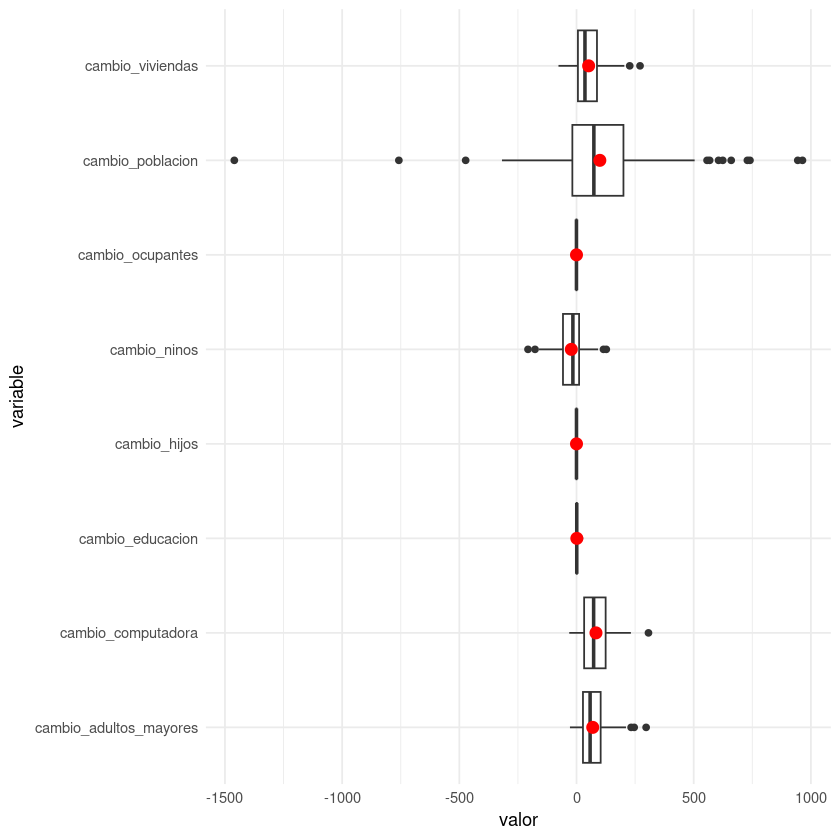

In [14]:
#los cambios deberian distribuirse alrededor de sus medias 
#para ver si hay cambios atípicos, se puede hacer un gráfico de caja y bigotes
#para cada variable de cambio

#crear un data frame con las medias
medias <- data.frame(
  variable = c("cambio_poblacion", "cambio_ninos", "cambio_adultos_mayores", "cambio_educacion", "cambio_hijos", "cambio_viviendas", "cambio_ocupantes", "cambio_computadora"),
  media = c(media_cambio_poblacion, media_cambio_ninos, media_cambio_adultos_mayores, media_cambio_educacion, media_cambio_hijos, media_cambio_viviendas, media_cambio_ocupantes, media_cambio_computadora)
)

# Reestructurar el dataframe a formato largo
data_combined_long <- data_combined %>%
  pivot_longer(
    cols = starts_with("cambio"),
    names_to = "variable",
    values_to = "valor"
  )

# Crear el gráfico de caja y bigotes
ggplot(data = data_combined_long) +
  geom_boxplot(mapping = aes(x = variable, y = valor)) +
  geom_point(data = medias, mapping = aes(x = variable, y = media), color = "red", size = 3) +
  coord_flip() +
  theme_minimal()

#guardar el gráfico
#ggsave("cambio_poblacion.png")

In [15]:

# Asignar puntajes según el método ITSE
data_combined <- data_combined %>%
  mutate(
    puntaje_poblacion = if_else(cambio_poblacion > media_cambio_poblacion, 1, -1),
    puntaje_ninos = if_else(cambio_ninos < media_cambio_ninos, 1, -1),
    puntaje_adultos_mayores = if_else(cambio_adultos_mayores < media_cambio_adultos_mayores, 1, -1),
    puntaje_educacion = if_else(cambio_educacion > media_cambio_educacion, 1, -1),
    puntaje_hijos = if_else(cambio_hijos < media_cambio_hijos, 1, -1),
    puntaje_viviendas = if_else(cambio_viviendas > media_cambio_viviendas, 1, -1),
    puntaje_ocupantes = if_else(cambio_ocupantes < media_cambio_ocupantes, 1, -1),
    puntaje_computadora = if_else(cambio_computadora > media_cambio_computadora, 1, -1)
  ) %>%
  # Calcular el ITSE sumando los puntajes
  mutate(ITSE = puntaje_poblacion + puntaje_ninos + puntaje_adultos_mayores +
               puntaje_educacion + puntaje_hijos + puntaje_viviendas +
               puntaje_ocupantes + puntaje_computadora)

# Revisar los nuevos puntajes y el ITSE
glimpse(data_combined)
summary(data_combined$ITSE) 

Rows: 128
Columns: 40
$ index_2010              <int> 4, 68, 97, 151, 180, 227, 241, 303, 359, 379, …
$ AGEB                    <chr> "0435", "044A", "0454", "0488", "0492", "0505"…
$ P_TOTAL_2010            <dbl> 3632, 1539, 2211, 2045, 557, 730, 3040, 1871, …
$ POB65_MAS_2010          <dbl> 325, 224, 188, 140, 15, 135, 276, 223, 194, 27…
$ GRAPROES_2010           <dbl> 9.617302, 9.569643, 10.994717, 8.206786, 7.670…
$ PROM_HNV_2010           <dbl> 2.1933333, 2.2642857, 1.9290566, 2.4053571, 0.…
$ VIVTOT_2010             <dbl> 1321, 549, 742, 635, 281, 300, 1083, 679, 903,…
$ PRO_OCUP_C_2010         <dbl> 0.85301587, 0.75071429, 0.66188679, 1.05607143…
$ PROM_OCUP_2010          <dbl> 3.3525397, 3.1521429, 3.1458491, 3.7960714, 1.…
$ VPH_PC_2010             <dbl> 584, 254, 438, 189, 189, 199, 497, 232, 612, 3…
$ OTRAENT_2010            <dbl> 1241, 478, 760, 743, 271, 282, 1074, 669, 873,…
$ P_0A5_2010              <dbl> 419, 135, 118, 290, 39, 20, 364, 174, 196, 146…
$ index_2020      

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.0000 -2.0000  0.0000 -0.2812  2.0000  8.0000 

In [16]:
#quantile(cambio_poblacion, 0.5, na.rm = TRUE)

In [17]:
# Usar cuantiles para asignar puntajes
#data_combined <- data_combined %>%
#  mutate(
#    puntaje_poblacion = if_else(cambio_poblacion > quantile(cambio_poblacion, 0.5, na.rm = TRUE), 1, -1),
#    puntaje_ninos = if_else(cambio_ninos < quantile(cambio_ninos, 0.5, na.rm = TRUE), 1, -1),
#  puntaje_adultos_mayores = if_else(cambio_adultos_mayores < quantile(cambio_adultos_mayores, 0.5, na.rm = TRUE), 1, -1),
#   puntaje_educacion = if_else(cambio_educacion > quantile(cambio_educacion, 0.5, na.rm = TRUE), 1, -1),
#    puntaje_hijos = if_else(cambio_hijos < quantile(cambio_hijos, 0.5, na.rm = TRUE), 1, -1),
#    puntaje_viviendas = if_else(cambio_viviendas > quantile(cambio_viviendas, 0.5, na.rm = TRUE), 1, -1),
#    puntaje_ocupantes = if_else(cambio_ocupantes < quantile(cambio_ocupantes, 0.5, na.rm = TRUE), 1, -1),
#    puntaje_computadora = if_else(cambio_computadora > quantile(cambio_computadora, 0.5, na.rm = TRUE), 1, -1)
#  ) %>%
#  mutate(ITSE = puntaje_poblacion + puntaje_ninos + puntaje_adultos_mayores +
#               puntaje_educacion + puntaje_hijos + puntaje_viviendas +
#               puntaje_ocupantes + puntaje_computadora)

# Revisar los nuevos puntajes y el ITSE
#glimpse(data_combined)
#summary(data_combined$ITSE)

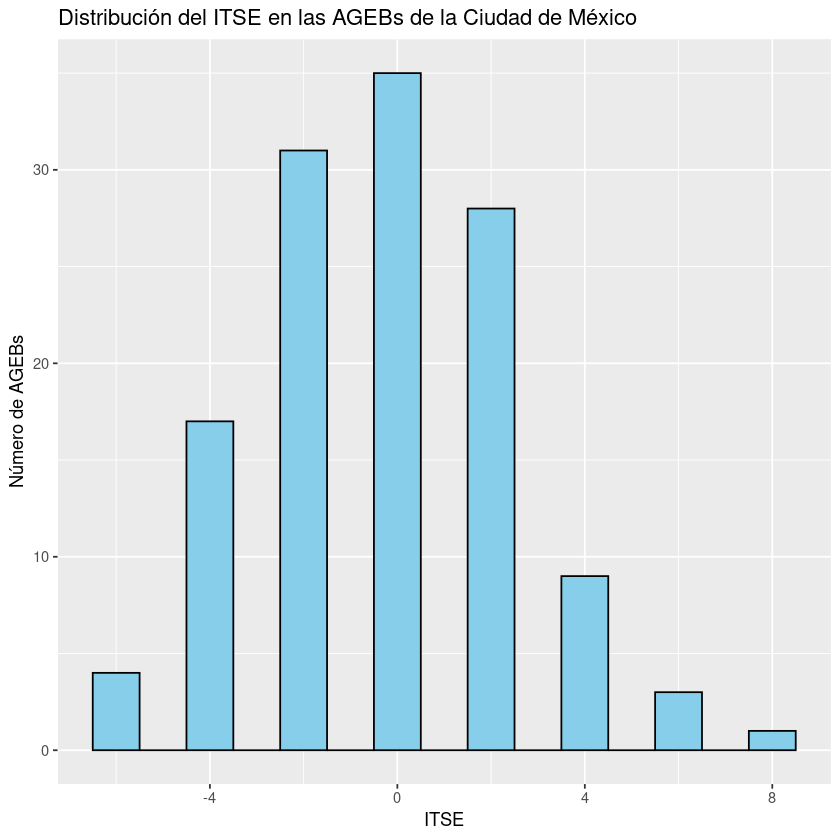

In [18]:
#graficar distribución de ITSE
ggplot(data_combined, aes(x = ITSE)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribución del ITSE en las AGEBs de la Ciudad de México",
       x = "ITSE",
       y = "Número de AGEBs")

# Guardar los datos

In [19]:
data_combined

index_2010,AGEB,P_TOTAL_2010,POB65_MAS_2010,GRAPROES_2010,PROM_HNV_2010,VIVTOT_2010,PRO_OCUP_C_2010,PROM_OCUP_2010,VPH_PC_2010,⋯,cambio_computadora,puntaje_poblacion,puntaje_ninos,puntaje_adultos_mayores,puntaje_educacion,puntaje_hijos,puntaje_viviendas,puntaje_ocupantes,puntaje_computadora,ITSE
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0435,3632,325,9.617302,2.1933333,1321,0.85301587,3.3525397,584,⋯,198,1,1,-1,-1,1,1,1,1,4
68,044A,1539,224,9.569643,2.2642857,549,0.75071429,3.1521429,254,⋯,76,-1,1,1,-1,1,-1,1,-1,0
97,0454,2211,188,10.994717,1.9290566,742,0.66188679,3.1458491,438,⋯,93,1,-1,-1,-1,1,1,1,1,2
151,0488,2045,140,8.206786,2.4053571,635,1.05607143,3.7960714,189,⋯,120,1,1,-1,-1,1,1,1,1,4
180,0492,557,15,7.670000,0.9128261,281,0.37260870,1.6482609,189,⋯,171,1,-1,-1,1,-1,1,-1,1,0
227,0505,730,135,14.026154,1.9992308,300,0.50615385,2.8623077,199,⋯,51,-1,-1,1,-1,1,1,1,-1,0
241,0524,3040,276,9.127049,2.5001639,1083,0.81688525,3.2960656,497,⋯,-4,-1,1,1,-1,1,-1,1,-1,0
303,0543,1871,223,8.496364,2.4614545,679,0.91418182,3.3274545,232,⋯,92,-1,1,1,-1,1,-1,1,1,2
359,0558,2426,194,12.341053,1.7957895,903,0.63578947,3.0394737,612,⋯,51,-1,1,-1,-1,-1,-1,1,-1,-4


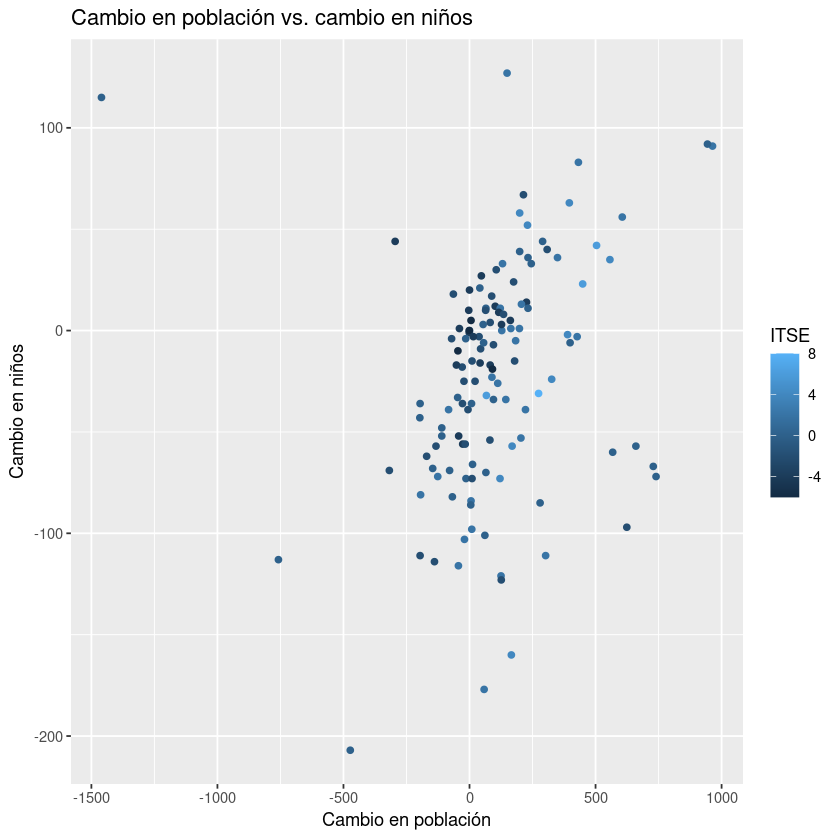

In [20]:
#graficar cambio en cada variable 
ggplot(data_combined, aes(x = cambio_poblacion, y = cambio_ninos)) +
  geom_point(aes(color = ITSE)) +
  labs(title = "Cambio en población vs. cambio en niños",
       x = "Cambio en población",
       y = "Cambio en niños",
       color = "ITSE")

### EXPORTAR ENS_AGEBS_ITSE.csv

In [21]:
#exportar los datos
write.csv(data_combined, "DATA/ENS_AGEBS_ITSE.csv", row.names = FALSE)

# que rollo

# MODELO

In [22]:
# Eliminar filas con NA/NaN/Inf en las columnas 'cambio_viviendas' y 'cambio_educacion'
data_combined <- data_combined[!is.na(data_combined$cambio_viviendas) & !is.na(data_combined$cambio_educacion) & !is.infinite(data_combined$cambio_viviendas) & !is.infinite(data_combined$cambio_educacion), ]

# Modelo de regresión lineal
model <- lm(cambio_poblacion ~ cambio_viviendas + cambio_educacion, data = data_combined)

# Resumen del modelo
summary(model)


Call:
lm(formula = cambio_poblacion ~ cambio_viviendas + cambio_educacion, 
    data = data_combined)

Residuals:
     Min       1Q   Median       3Q      Max 
-1673.48   -98.44   -23.82    80.88   797.86 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)       29.7591    35.4775   0.839   0.4032  
cambio_viviendas   0.9685     0.3921   2.470   0.0149 *
cambio_educacion  14.2821    14.6054   0.978   0.3300  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.3 on 125 degrees of freedom
Multiple R-squared:  0.06104,	Adjusted R-squared:  0.04602 
F-statistic: 4.063 on 2 and 125 DF,  p-value: 0.01952
